In [15]:
# importing the neccessary libraries used in this project.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading our dataset to work on.
data = pd.read_csv("/home/vinayyadav/Documents/Electric Vehicle Sales by State in India.csv")
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [7]:
# finding the basic iformation about our data.
data.info()
data.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


774760

In [8]:
# Converting 'date' to datetime.
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)

Year                        float64
Month_Name                   object
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
dtype: object


In [11]:
# looking for the null values if any.
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [10]:
# deleting any duplicates values if any.
data= data.drop_duplicates()
print("successfully deleted duplicate values.")

successfully deleted duplicate values.


In [14]:
# filling missing values (if any) using median for numerical columns or mode for categorical columns

data['EV_Sales_Quantity'].fillna(data['EV_Sales_Quantity'].median(),inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)
print("Missing values are filled successfully.")

Missing values are filled successfully.


/tmp/ipykernel_8658/3769243016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['EV_Sales_Quantity'].fillna(data['EV_Sales_Quantity'].median(),inplace=True)


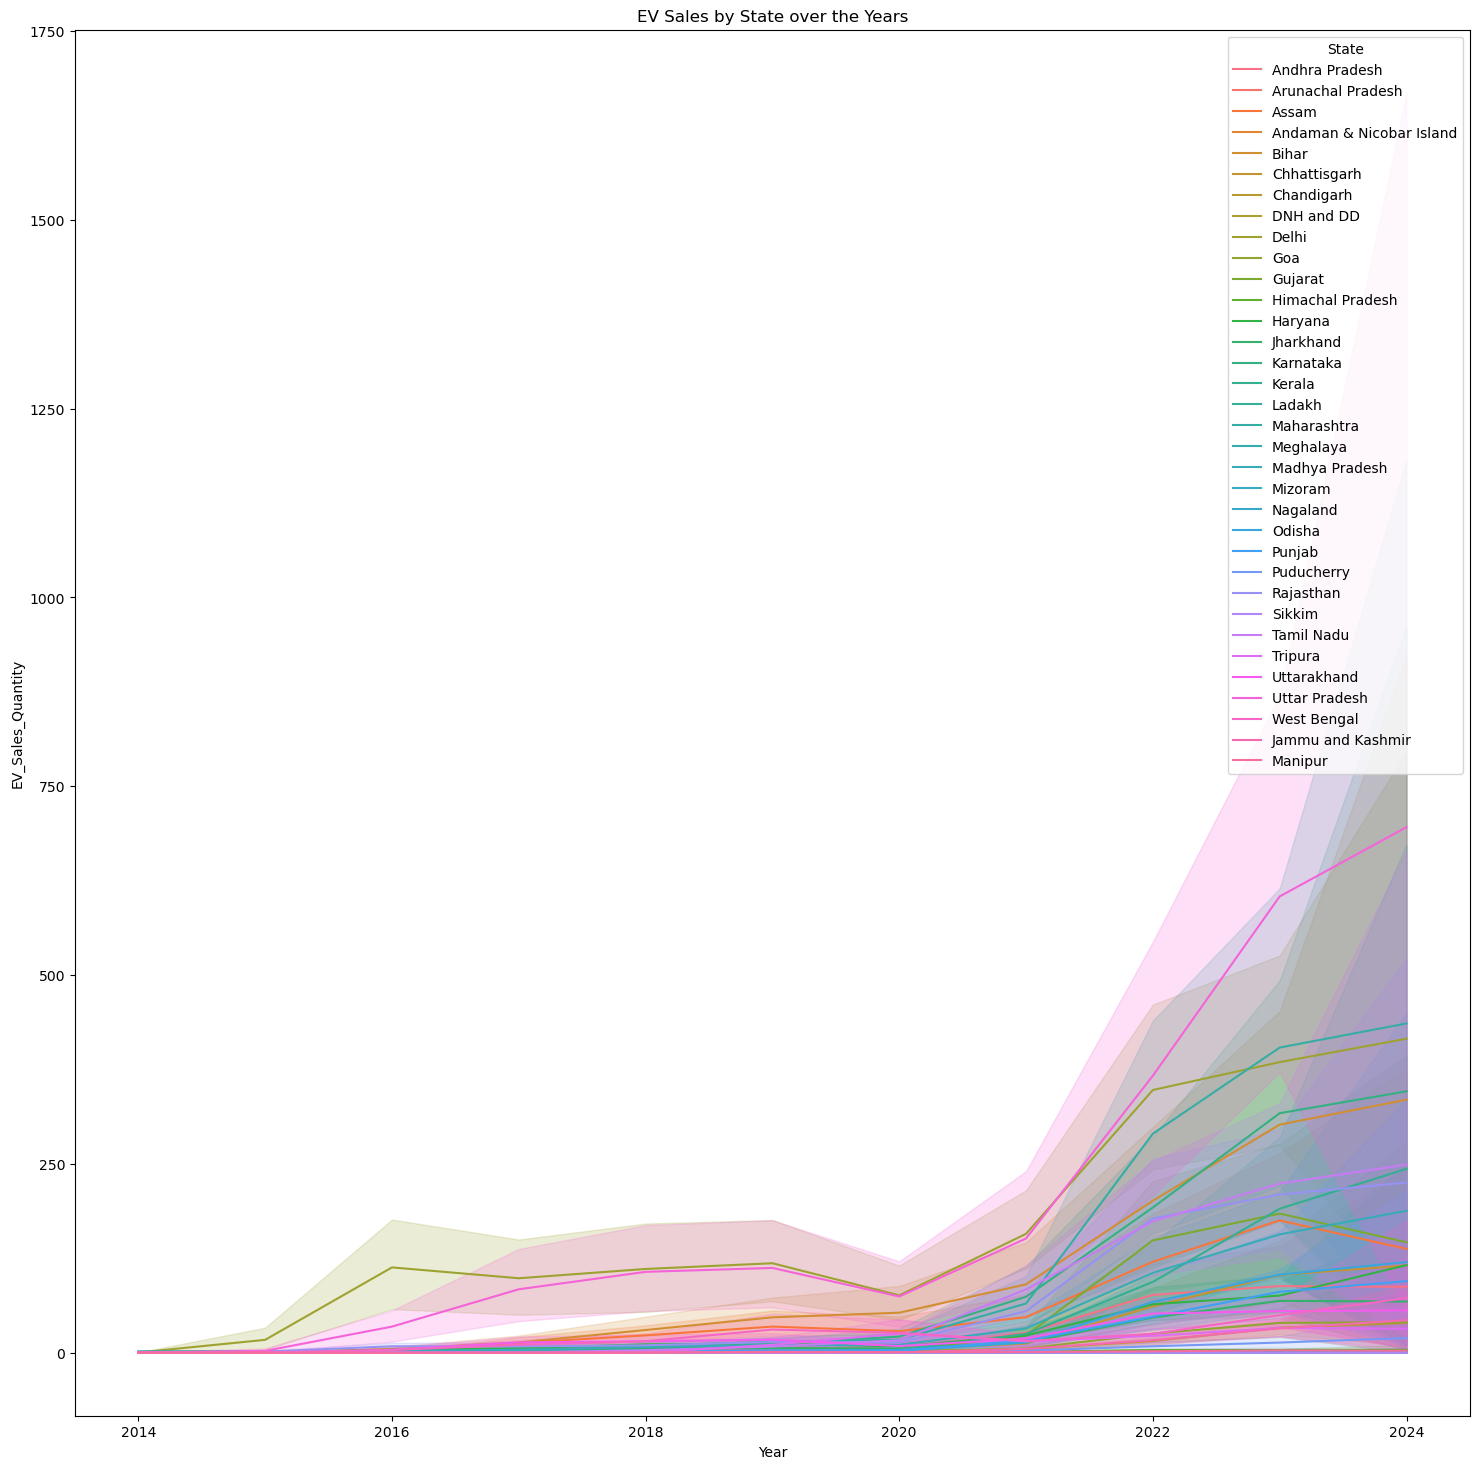

In [23]:
# plotting the ev sales over the years
plt.figure(figsize=(18,18))
sns.lineplot(data=data, x='Year', y='EV_Sales_Quantity',hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

/tmp/ipykernel_8658/1343817825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',data=data,palette='Set2')


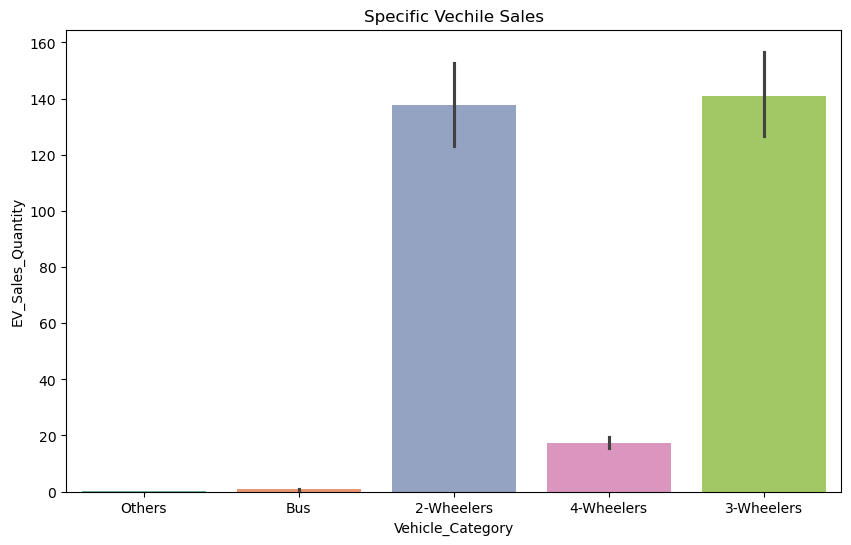

In [28]:
# plotting the specific vechile sales.
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',data=data,palette='Set2')
plt.title('Specific Vechile Sales')
plt.show()

<Axes: title={'center': 'Top 10 states with most sales.'}, ylabel='count'>

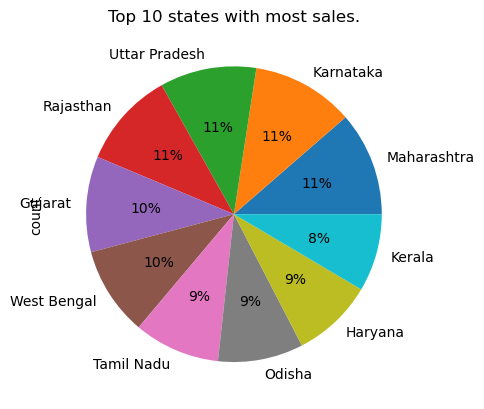

In [40]:
# Top 10 states with most sales.
top_states=data.State.value_counts().head(10)
plt.title("Top 10 states with most sales.")
top_states.plot(kind = 'pie',autopct ='%.0f%%')

<Axes: title={'center': 'Top 10 vehicle with most sales.'}, ylabel='count'>

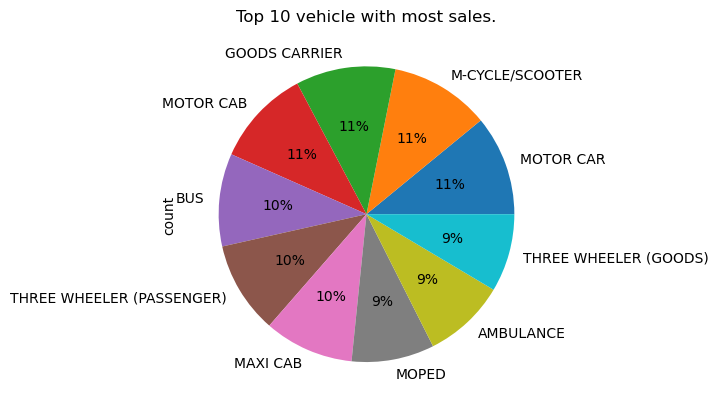

In [39]:
# Top 10 vehicle with most sales.

top_vehicle=data.Vehicle_Class.value_counts().head(10)
plt.title("Top 10 vehicle with most sales.")
top_vehicle.plot(kind = 'pie',autopct ='%.0f%%')

<Axes: title={'center': 'Vehicle Category.'}, ylabel='count'>

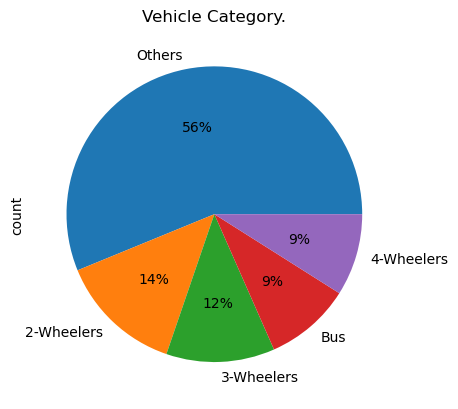

In [44]:
# plotting the vehicle categories.
vehicle_category=data.Vehicle_Category.value_counts()
plt.title("Vehicle Category.")
vehicle_category.plot(kind = 'pie',autopct ='%.0f%%')

Text(0, 0.5, 'EV Sales')

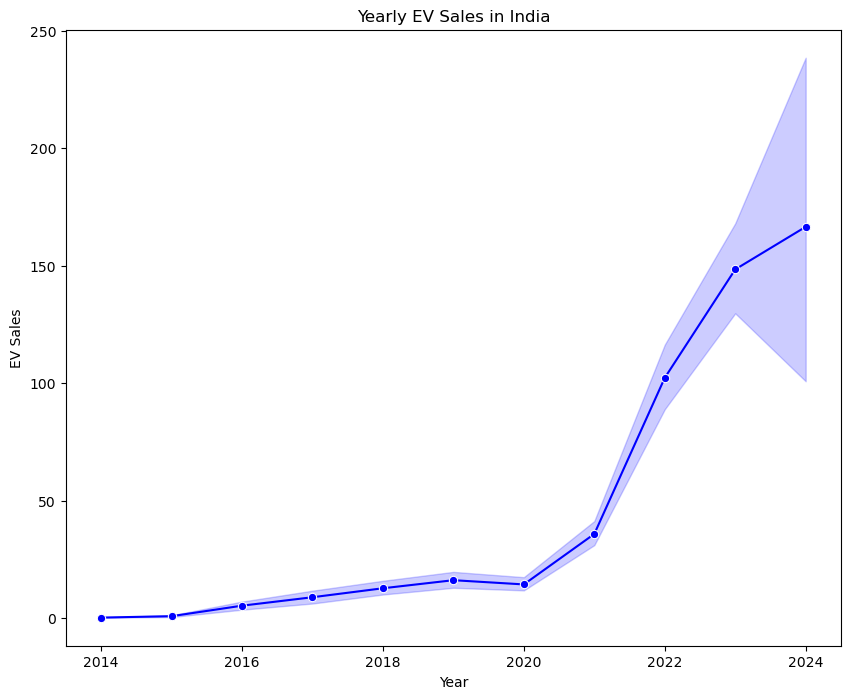

In [48]:
# plotting yearly sales in india.
plt.figure(figsize=(10,8))
plt.title('Yearly EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=data,marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales')

Text(0, 0.5, 'EV Sales')

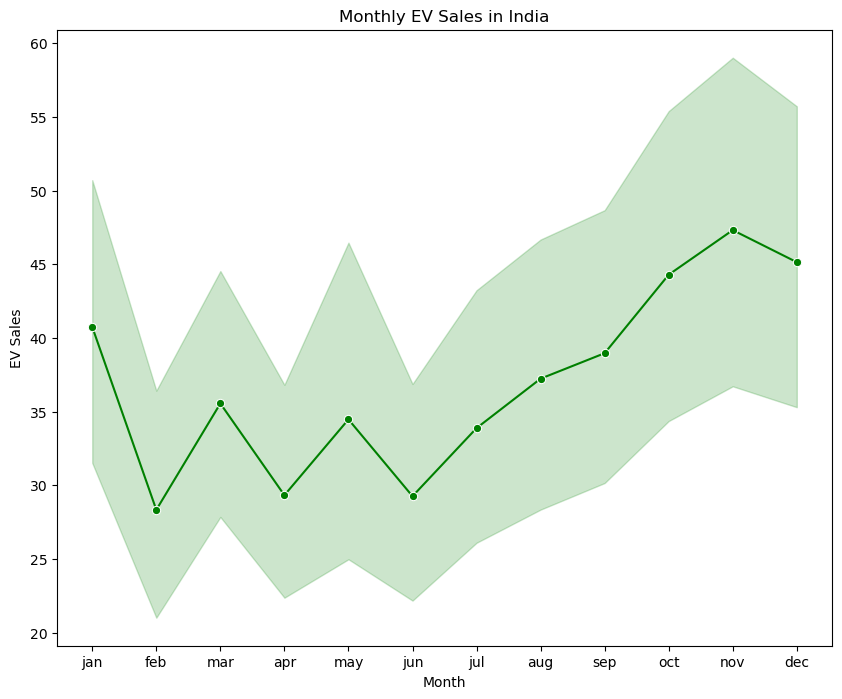

In [53]:
# plotting monthly sales in india.
plt.figure(figsize=(10,8))
plt.title('Monthly EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=data,marker='o', color='g')
plt.xlabel('Month')
plt.ylabel('EV Sales')

Date
3/1/2020     933
7/1/2019     887
3/1/2017     877
5/1/2019     876
3/1/2018     876
3/1/2023     876
3/1/2019     873
1/1/2020     872
11/1/2023    871
2/1/2020     870
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 sales on a single date'}, ylabel='count'>

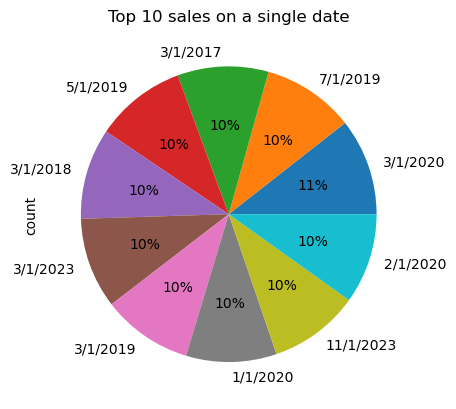

In [59]:
# plotting top 10 sales on a single date.
top_sales_date=data.Date.value_counts().head(10)
print(top_sales_date)
plt.title("Top 10 sales on a single date")
top_sales_date.plot(kind = 'pie',autopct ='%.0f%%')

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 sales in a single year'}, ylabel='count'>

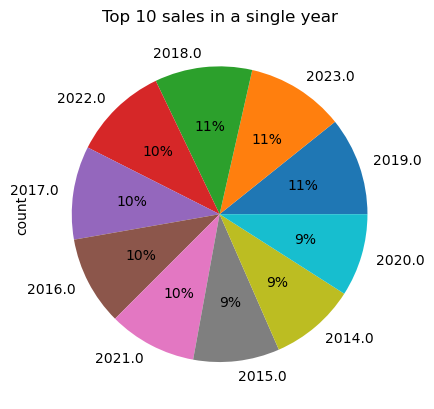

In [60]:
# plotting top 10 sales in a single year.
top_sales_year=data.Year.value_counts().head(10)
print(top_sales_year)
plt.title("Top 10 sales in a single year")
top_sales_year.plot(kind = 'pie',autopct ='%.0f%%')